In [144]:
# If you'd like to try this lab with PCA instead of Isomap,
# as the dimensionality reduction technique:
Test_PCA = True


def plotDecisionBoundary(model, X, y):
  print "Plotting..."
  import matplotlib.pyplot as plt
  import matplotlib
  matplotlib.style.use('ggplot') # Look Pretty

  fig = plt.figure()
  ax = fig.add_subplot(111)

  padding = 0.1
  resolution = 0.1

  #(2 for benign, 4 for malignant)
  colors = {2:'royalblue',4:'lightsalmon'} 

  
  # Calculate the boundaris
  x_min, x_max = X[:, 0].min(), X[:, 0].max()
  y_min, y_max = X[:, 1].min(), X[:, 1].max()
  x_range = x_max - x_min
  y_range = y_max - y_min
  x_min -= x_range * padding
  y_min -= y_range * padding
  x_max += x_range * padding
  y_max += y_range * padding

  # Create a 2D Grid Matrix. The values stored in the matrix
  # are the predictions of the class at at said location
  import numpy as np
  xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                       np.arange(y_min, y_max, resolution))

  # What class does the classifier say?
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

  # Plot the contour map
  plt.contourf(xx, yy, Z, cmap=plt.cm.seismic)
  plt.axis('tight')

  # Plot your testing points as well...
  for label in np.unique(y):
    indices = np.where(y == label)
    plt.scatter(X[indices, 0], X[indices, 1], c=colors[label], alpha=0.8)

  p = model.get_params()
  score = model.score(X,y)
  plt.title('K = ' + str(p['n_neighbors'])+' score: '+str(score))
  plt.show()

In [145]:
# 
# TODO: Load in the dataset, identify nans, and set proper headers.
# Be sure to verify the rows line up by looking at the file in a text editor.
#
# .. your code here ..
import pandas as pd 
names = ['sample', 'thickness', 'size', 'shape', 'adhesion', 'epithelial', 'nuclei', 'chromatin', 'nucleoli', 'mitoses', 'status']
df = pd.read_csv('Datasets/breast-cancer-wisconsin.data', names=names)
print(df.head(5))
print(df.describe())

    sample  thickness  size  shape  adhesion  epithelial nuclei  chromatin  \
0  1000025          5     1      1         1           2      1          3   
1  1002945          5     4      4         5           7     10          3   
2  1015425          3     1      1         1           2      2          3   
3  1016277          6     8      8         1           3      4          3   
4  1017023          4     1      1         3           2      1          3   

   nucleoli  mitoses  status  
0         1        1       2  
1         2        1       2  
2         1        1       2  
3         7        1       2  
4         1        1       2  
             sample   thickness        size       shape    adhesion  \
count  6.990000e+02  699.000000  699.000000  699.000000  699.000000   
mean   1.071704e+06    4.417740    3.134478    3.207439    2.806867   
std    6.170957e+05    2.815741    3.051459    2.971913    2.855379   
min    6.163400e+04    1.000000    1.000000    1.000000    1.

In [146]:
# 
# TODO: Copy out the status column into a slice, then drop it from the main
# dataframe. You can also drop the sample column, since that doesn't provide
# us with any machine learning power.
#
# .. your code here ..
status = df['status']
df = df.drop('status', axis=1)
df = df.drop('sample', axis=1)


In [147]:
print(df.dtypes)
print(df['nuclei'])

thickness      int64
size           int64
shape          int64
adhesion       int64
epithelial     int64
nuclei        object
chromatin      int64
nucleoli       int64
mitoses        int64
dtype: object
0       1
1      10
2       2
3       4
4       1
5      10
6      10
7       1
8       1
9       1
10      1
11      1
12      3
13      3
14      9
15      1
16      1
17      1
18     10
19      1
20     10
21      7
22      1
23      ?
24      1
25      7
26      1
27      1
28      1
29      1
       ..
669     5
670     8
671     1
672     1
673     1
674     1
675     1
676     1
677     1
678     1
679     1
680    10
681    10
682     1
683     1
684     1
685     1
686     1
687     1
688     1
689     1
690     1
691     5
692     1
693     1
694     2
695     1
696     3
697     4
698     5
Name: nuclei, dtype: object


In [148]:
#
# TODO: With the labels safely extracted from the dataset, replace any nan values
# with the mean feature / column value
#
# .. your code here ..
for column in df.columns:
    if column == 'nuclei': pass
    else:
        print(str(df[column].mean())+ ' '+column)
        df[column] = df[column].fillna(df[column].mean())

4.41773962804 thickness
3.13447782546 size
3.20743919886 shape
2.80686695279 adhesion
3.21602288984 epithelial
3.43776824034 chromatin
2.8669527897 nucleoli
1.58941344778 mitoses


In [149]:
df['nuclei'] = pd.to_numeric(df['nuclei'], errors='coerce')
df['nuclei'] = df['nuclei'].fillna(df['nuclei'].mean())
df['nuclei'] = df['nuclei'].astype(int)

In [150]:
#
# TODO: Experiment with the basic SKLearn preprocessing scalers. We know that
# the features consist of different units mixed in together, so it's reasonable
# to assume feature scaling is necessary. Print out a description of the
# dataset, post transformation.
#
# .. your code here ..
# Pay attention to the direction of the arrows, as well as their LENGTHS
from sklearn import preprocessing
#Tss = preprocessing.StandardScaler().fit_transform(df)
#Tmm = preprocessing.MinMaxScaler().fit_transform(df)
#Tma = preprocessing.MaxAbsScaler().fit_transform(df)
#Tn = preprocessing.Normalizer().fit_transform(df)
#T = df # No Change
scalers = [preprocessing.StandardScaler().fit_transform(df)
           , preprocessing.MinMaxScaler().fit_transform(df)
           , preprocessing.MaxAbsScaler().fit_transform(df)
           , preprocessing.Normalizer().fit_transform(df)
           , df]
for scaler in scalers: print scaler

[[ 0.20693572 -0.69999505 -0.74329904 ..., -0.17966213 -0.61182504
  -0.34391178]
 [ 0.20693572  0.28384518  0.2668747  ..., -0.17966213 -0.28411186
  -0.34391178]
 [-0.50386559 -0.69999505 -0.74329904 ..., -0.17966213 -0.61182504
  -0.34391178]
 ..., 
 [ 0.20693572  2.25152563  2.28722218 ...,  1.87236122  2.33759359
   0.23956962]
 [-0.14846494  1.59563215  0.94032386 ...,  2.69317056  1.02674087
  -0.34391178]
 [-0.14846494  1.59563215  1.61377302 ...,  2.69317056  0.37131451
  -0.34391178]]
[[ 0.44444444  0.          0.         ...,  0.22222222  0.          0.        ]
 [ 0.44444444  0.33333333  0.33333333 ...,  0.22222222  0.11111111  0.        ]
 [ 0.22222222  0.          0.         ...,  0.22222222  0.          0.        ]
 ..., 
 [ 0.44444444  1.          1.         ...,  0.77777778  1.          0.11111111]
 [ 0.33333333  0.77777778  0.55555556 ...,  1.          0.55555556  0.        ]
 [ 0.33333333  0.77777778  0.77777778 ...,  1.          0.33333333  0.        ]]
[[ 0.5  0.1 

In [151]:
#
# TODO: Do train_test_split. Use the same variable names as on the EdX platform in
# the reading material, but set the random_state=7 for reproduceability, and keep
# the test_size at 0.33 (33%).
#
# .. your code here ..
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( df,status, test_size=0.33, random_state=7)

In [152]:
import sys

Plotting...


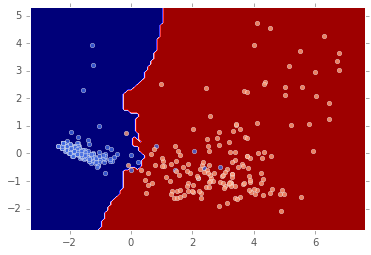

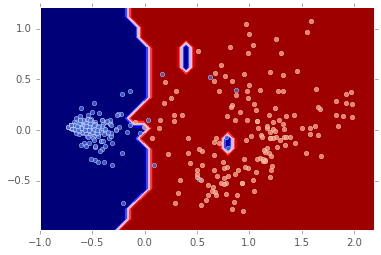

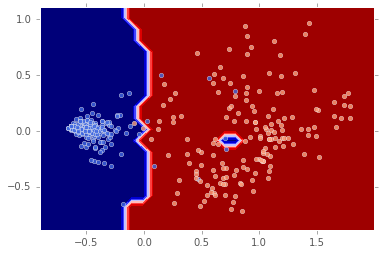

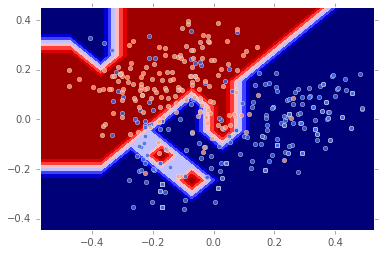

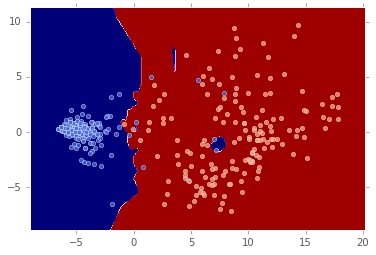

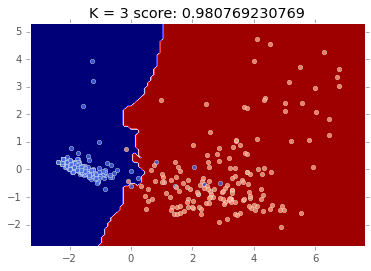

Plotting...


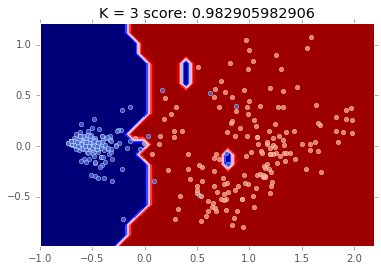

Plotting...


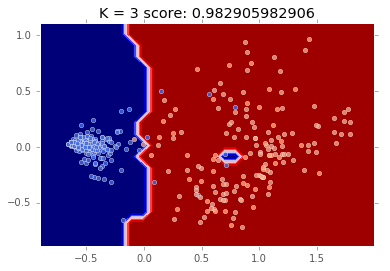

Plotting...


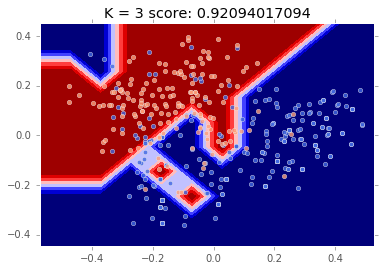

Plotting...


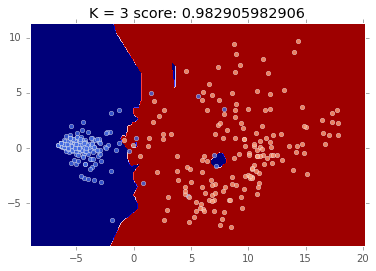

In [153]:
for scaler in scalers: 
    try: 
        X_train, X_test, y_train, y_test = train_test_split( scaler,status, test_size=0.33, random_state=7)
        pca = doPCA(X_train)
        data_train = pca.transform(X_train)
        data_test = pca.transform(X_test)
        knn = KNeighborsClassifier(n_neighbors=3)
        knn.fit(data_train, y_train) 
        plotDecisionBoundary(knn, data_train, y_train)
    except:
        print(sys.exc_info())

In [154]:
from sklearn.manifold import isomap

In [125]:

def doIso(data, dimensions=2):
  model = isomap.Isomap()
  model.fit(data)
  return model
iso = doIso(df)

Plotting...


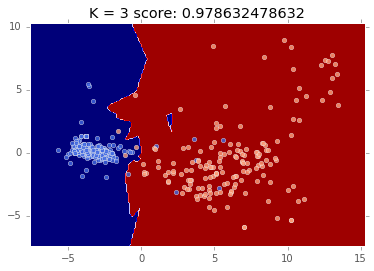

Plotting...


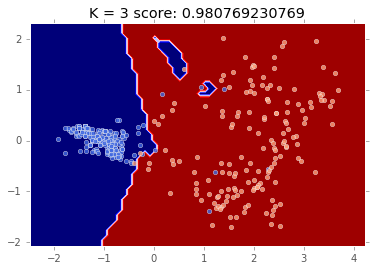

Plotting...


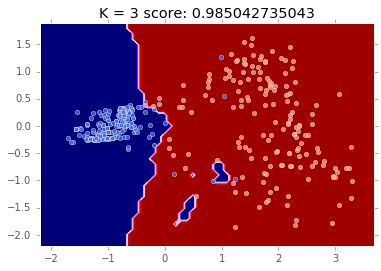

Plotting...


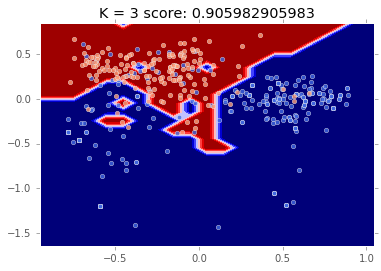

Plotting...


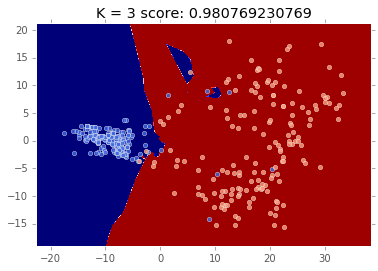

In [155]:
for scaler in scalers: 
    try: 
        X_train, X_test, y_train, y_test = train_test_split( scaler,status, test_size=0.33, random_state=7)
        pca = doIso(X_train)
        data_train = pca.transform(X_train)
        data_test = pca.transform(X_test)
        knn = KNeighborsClassifier(n_neighbors=3)
        knn.fit(data_train, y_train) 
        plotDecisionBoundary(knn, data_train, y_train)
    except:
        print(sys.exc_info())

In [78]:
#
# PCA and Isomap are your new best friends
model = None
if Test_PCA:
  print "Computing 2D Principle Components"
  #
  # TODO: Implement PCA here. save your model into the variable 'model'.
  # You should reduce down to two dimensions.
  #
  # .. your code here ..
  
    
else:
  print "Computing 2D Isomap Manifold"
  #
  # TODO: Implement Isomap here. save your model into the variable 'model'
  # Experiment with K values from 5-10.
  # You should reduce down to two dimensions.
  #
  # .. your code here ..
from sklearn.decomposition import PCA
def doPCA(data, dimensions=2):
  model = PCA(n_components=dimensions)
  model.fit(data)
  return model

Computing 2D Principle Components


In [46]:
#
# TODO: Train your model against data_train, then transform both
# data_train and data_test using your model. You can save the results right
# back into the variables themselves.
#
# .. your code here ..
model = doPCA(X_train)
data_train = model.transform(X_train)
data_test = model.transform(X_test)

//anaconda/envs/python2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:52: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)


In [60]:
print(data_train.dtype)
print(data_test.dtype)

float64
float64


In [61]:
# 
# TODO: Implement and train KNeighborsClassifier on your projected 2D
# training data here. You can use any K value from 1 - 15, so play around
# with it and see what results you can come up. Your goal is to find a
# good balance where you aren't too specific (low-K), nor are you too
# general (high-K). You should also experiment with how changing the weights
# parameter affects the results.
#
# .. your code here ..
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(data_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [62]:
#
# INFO: Be sure to always keep the domain of the problem in mind! It's
# WAY more important to errantly classify a benign tumor as malignant,
# and have it removed, than to incorrectly leave a malignant tumor, believing
# it to be benign, and then having the patient progress in cancer. Since the UDF
# weights don't give you any class information, the only way to introduce this
# data into SKLearn's KNN Classifier is by "baking" it into your data. For
# example, randomly reducing the ratio of benign samples compared to malignant
# samples from the training set.

In [63]:
#
# TODO: Calculate + Print the accuracy of the testing set
#
# .. your code here ..


plotDecisionBoundary(model, data_train, data_test)

Plotting...


KeyError: -6.6025723769477205